<a href="https://colab.research.google.com/github/wal-03/Final-Project-Machine-Learning-GDSC-2024/blob/main/Grup_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediksi Kalori**

**Studi Kasus:**   
Seorang direktur perusahaan kimia sedang melakukan riset untuk memprediksi apa saja faktor yang mempengaruhi dari bertambah atau kurangnya suatu kalori dari manusia. Hasil riset tersebut akan digunakan untuk membuat produk kesehatan agar masyrakat mampu mengatur kadar kalori yang dimilikinya. Sebagai seorang machine learning engineer, apa yang akan anda lakukan agar direktur tersebut dapat membuat keputusan tentang produk tersebut?

**Guideline dan Data:** https://drive.google.com/drive/folders/18hYEBbEA_2dudiOszqPkyT5XKwohaDdc

## 1. Import Library yang dibutuhkan

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
%matplotlib inline

## 2. Upload Dataset

In [ ]:
!wget -O calories.csv https://www.dropbox.com/scl/fi/g7agb06972rle35n1vwlf/Copy-of-calories-1.csv?rlkey=aedgag43li0zwl93uxh8xicrm&dl=0
!wget -O exercises.csv https://www.dropbox.com/scl/fi/1bld6jxo3i51bmmejidfr/Copy-of-exercise.csv?rlkey=y50pae1jk66p0gyz6rzumi3ku&dl=0

--2024-03-27 03:22:48--  https://www.dropbox.com/scl/fi/g7agb06972rle35n1vwlf/Copy-of-calories-1.csv?rlkey=aedgag43li0zwl93uxh8xicrm
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9904ae812949d7a0bf13fc464e.dl.dropboxusercontent.com/cd/0/inline/CP3yS_-6bR_d3h6ZYzw5XpS0M4tFM6W_LSesv5JMQCSXTBRGRSrwsDOnMezaAstdIVxugG3rCNYDSR8N1wNzfuFxiAGs74MrsBK3SVuPrk3YhTPj-47dt9Xe9Q2w2HrU5P6462AWKVO_lRorsxW4sVQf/file# [following]
--2024-03-27 03:22:48--  https://uc9904ae812949d7a0bf13fc464e.dl.dropboxusercontent.com/cd/0/inline/CP3yS_-6bR_d3h6ZYzw5XpS0M4tFM6W_LSesv5JMQCSXTBRGRSrwsDOnMezaAstdIVxugG3rCNYDSR8N1wNzfuFxiAGs74MrsBK3SVuPrk3YhTPj-47dt9Xe9Q2w2HrU5P6462AWKVO_lRorsxW4sVQf/file
Resolving uc9904ae812949d7a0bf13fc464e.dl.dropboxusercontent.com (uc9904ae812949d7a0bf13fc464e.dl.dropboxusercontent.com)... 162.125.5.

In [ ]:
#Masukkan Kedalam Variabel
exercise = pd.read_csv('/content/exercises.csv')
calories = pd.read_csv('/content/calories.csv')

#Gabungkan menjadi satu dataset
dataset = pd.merge(exercise, calories, on = 'User_ID')
dataset.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [ ]:
dataset.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [ ]:
dataset.tail(10)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
14990,19715870,female,22,190.0,79.0,19.0,96.0,40.3,89.0
14991,10050978,male,51,181.0,87.0,9.0,91.0,39.6,44.0
14992,14722670,male,27,170.0,70.0,13.0,92.0,40.1,46.0
14993,13584585,male,45,179.0,78.0,11.0,98.0,39.9,60.0
14994,18209611,female,48,159.0,57.0,10.0,94.0,39.8,52.0
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0
14999,11751526,male,63,173.0,79.0,18.0,92.0,40.5,98.0


## 3. Exploratory Data Analysis

In [ ]:
# mengecek ukuran dataset
dataset.shape

(15000, 9)

In [ ]:
# menampilkan semua kolom dataset
dataset.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories'],
      dtype='object')

In [ ]:
# menghapus kolom Gender
dataset.drop(["Gender"], axis=1, inplace=True)

In [ ]:
# Info dari dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Age         15000 non-null  int64  
 2   Height      15000 non-null  float64
 3   Weight      15000 non-null  float64
 4   Duration    15000 non-null  float64
 5   Heart_Rate  15000 non-null  float64
 6   Body_Temp   15000 non-null  float64
 7   Calories    15000 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 1.0 MB


In [ ]:
# deskripsi dari dataset
dataset.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [ ]:
# mengecek tipe data
dataset.dtypes

User_ID         int64
Age             int64
Height        float64
Weight        float64
Duration      float64
Heart_Rate    float64
Body_Temp     float64
Calories      float64
dtype: object

In [ ]:

# Untuk mengecek data duplikat (kalau 0 berarti tidak ada data duplikat)
dataset.duplicated().sum()

0

In [ ]:
# Untuk mengecek jumlah missing value di setiap variabel (kalau 0 berarti tidak ada missing value)
dataset.isnull().sum()

User_ID       0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

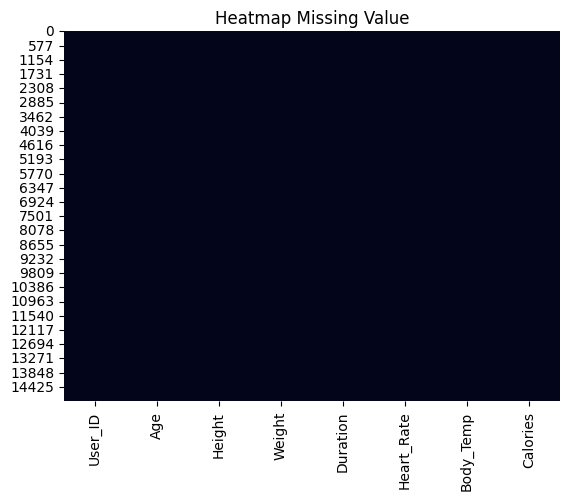

In [ ]:
# mengecek missing value dengan heatmap
sns.heatmap(dataset.isnull(), cbar=False)
plt.title('Heatmap Missing Value')
plt.show()

<Axes: ylabel='Height'>

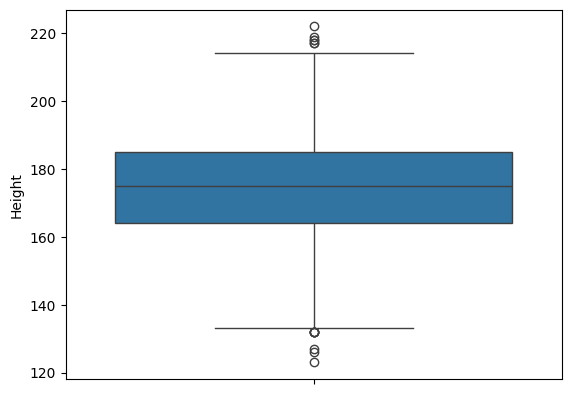

In [ ]:
sns.boxplot(dataset["Height"])

<ipython-input-55-d2c3f7d6052a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Height"])


<Axes: xlabel='Height', ylabel='Density'>

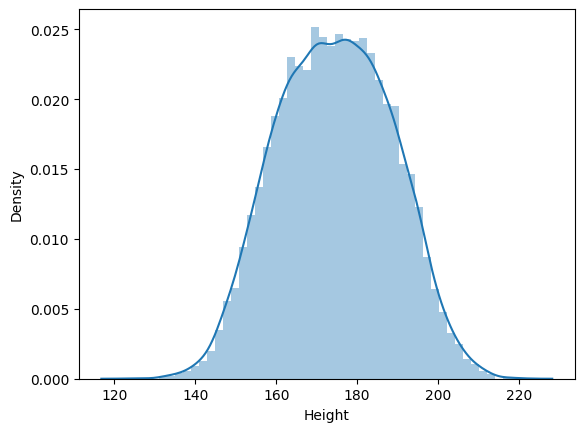

In [ ]:
sns.distplot(dataset["Height"])

<Axes: ylabel='Calories'>

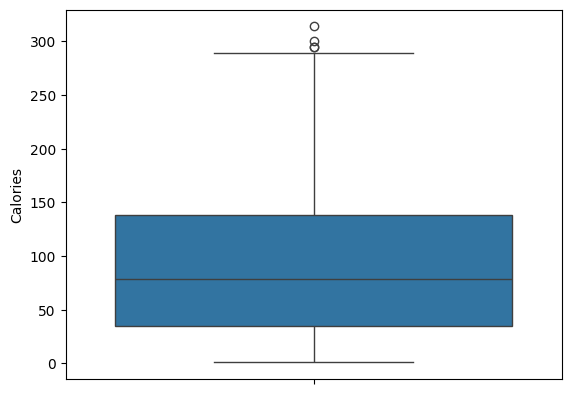

In [ ]:
sns.boxplot(dataset["Calories"])

In [ ]:
upper_limit = dataset["Calories"].mean() + 3*dataset["Calories"].std()
lower_limit = dataset["Calories"].mean() - 3*dataset["Calories"].std()
print("upper limit:", upper_limit)
print("lower limit:", lower_limit)

upper limit: 276.91046720114866
lower limit: -97.83140053448201


In [ ]:
# Mencari nilai z_score untuk mengetahui seberapa jauh dari pusat datanya
z_score= abs(dataset.Calories - dataset.Calories.mean())/dataset.Calories.std()<=2
print(z_score.shape)

(15000,)


In [ ]:
z_score.sum()

14578

In [ ]:
df = pd.DataFrame(dataset)

# Membuat fungsi untuk menghitung jumlah outlier dengan menggunakan IQR
def count_outliers_iqr(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return np.sum((column < lower_bound) | (column > upper_bound))

# Membuat DataFrame untuk menyimpan hasil
outliers_df = pd.DataFrame(index=['Outliers (IQR)'])

# Menghitung jumlah outlier untuk setiap variabel menggunakan IQR
for column in df.columns:
    if df[column].dtype != 'object':
        outliers_df[column] = [count_outliers_iqr(df[column])]

print(outliers_df)

                User_ID  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
Outliers (IQR)        0    0      14       6         0           1        369   

                Calories  
Outliers (IQR)         4  


In [ ]:
dataset.head(2)

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,20,166.0,60.0,14.0,94.0,40.3,66.0


### Univariate

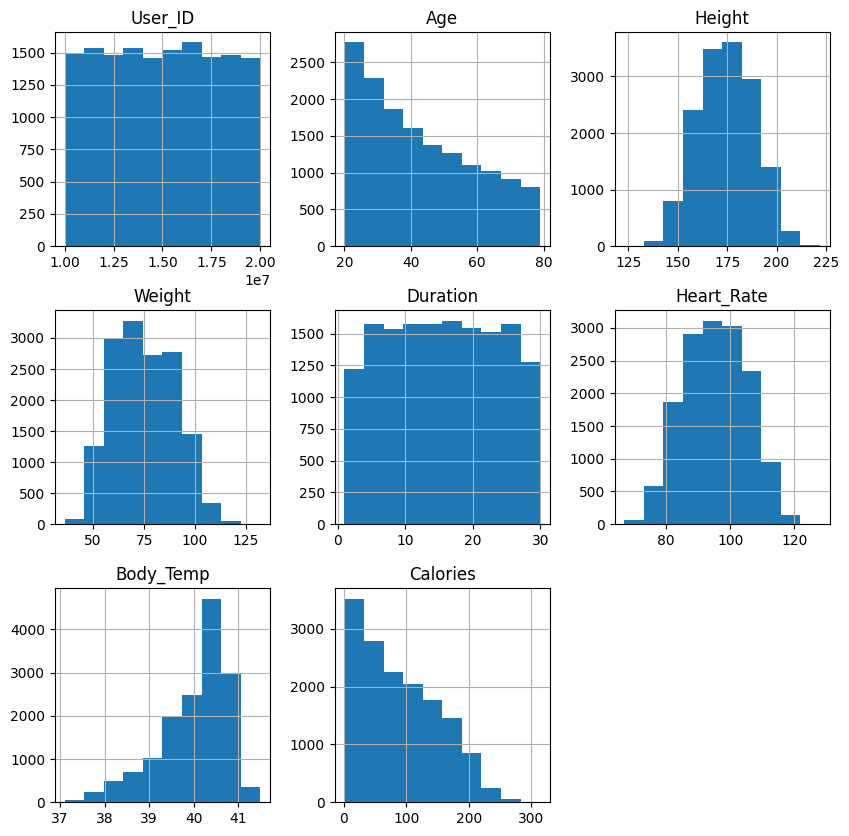

In [ ]:
dataset.hist(figsize=(10, 10))
plt.show()

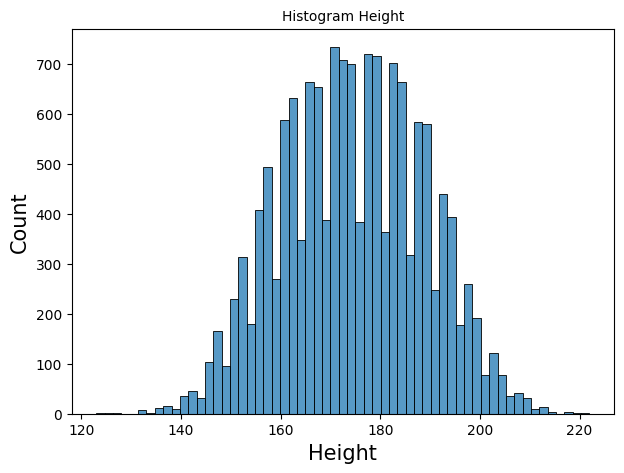

In [ ]:
plt.figure(figsize=(7, 5))  # Mengatur ukuran gambar
sns.histplot(dataset, x='Height')
plt.title('Histogram Height', size=10)  # Mengatur ukuran font judul
plt.xlabel('Height', fontsize=15)  # Mengatur ukuran font label sumbu x
plt.ylabel('Count', fontsize=15)  # Mengatur ukuran font label sumbu y
plt.show()

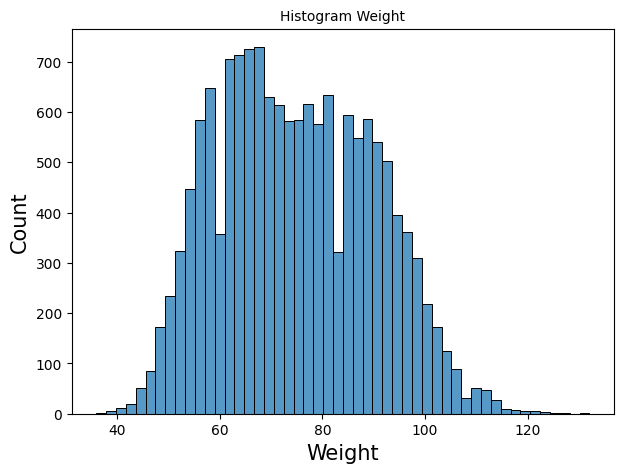

In [ ]:
plt.figure(figsize=(7, 5))  # Mengatur ukuran gambar
sns.histplot(dataset, x='Weight')
plt.title('Histogram Weight', size=10)  # Mengatur ukuran font judul
plt.xlabel('Weight', fontsize=15)  # Mengatur ukuran font label sumbu x
plt.ylabel('Count', fontsize=15)  # Mengatur ukuran font label sumbu y
plt.show()

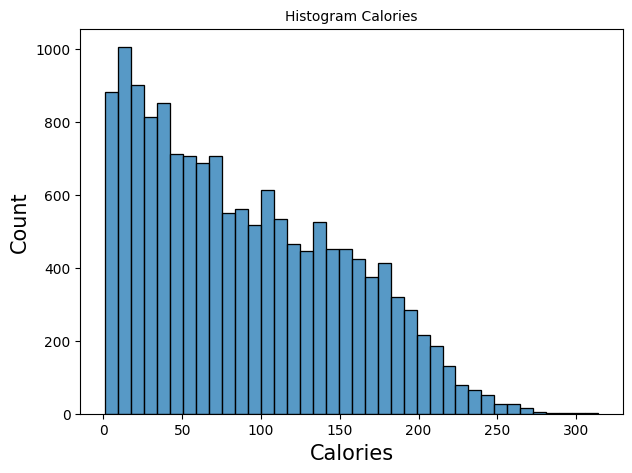

In [ ]:
plt.figure(figsize=(7, 5))  # Mengatur ukuran gambar
sns.histplot(dataset, x='Calories')
plt.title('Histogram Calories', size=10)  # Mengatur ukuran font judul
plt.xlabel('Calories', fontsize=15)  # Mengatur ukuran font label sumbu x
plt.ylabel('Count', fontsize=15)  # Mengatur ukuran font label sumbu y
plt.show()

### Bivariate

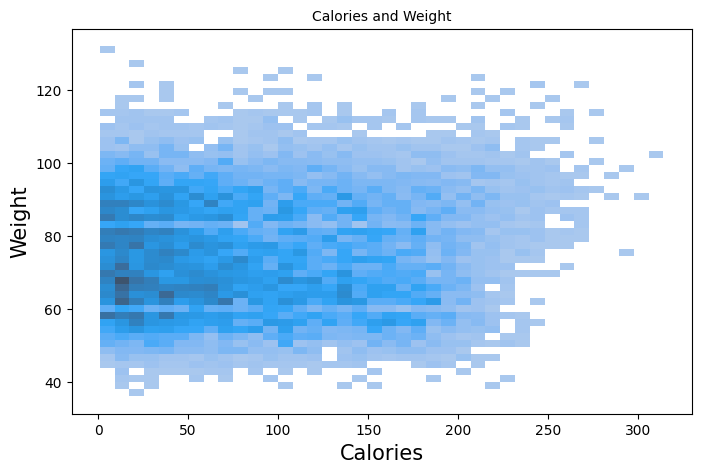

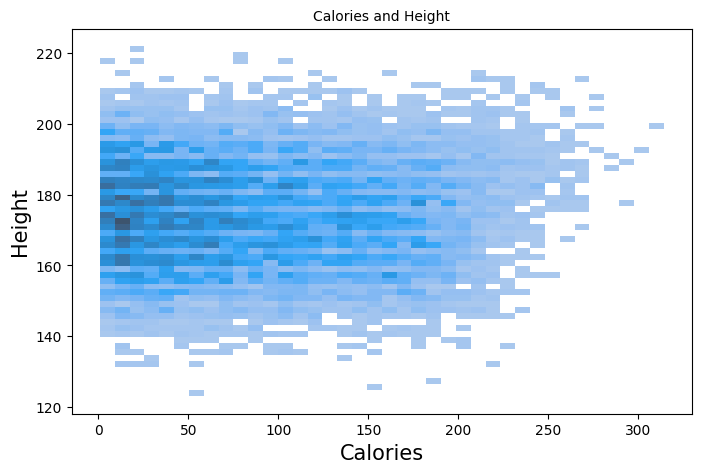

In [ ]:
plt.figure(figsize=(8, 5))  # Mengatur ukuran gambar
sns.histplot(dataset, x='Calories', y='Weight')
plt.title('Calories and Weight', size=10)  # Mengatur ukuran font judul
plt.xlabel('Calories', fontsize=15)  # Mengatur ukuran font label sumbu x
plt.ylabel('Weight', fontsize=15)  # Mengatur ukuran font label sumbu y
plt.show()

plt.figure(figsize=(8, 5))  # Mengatur ukuran gambar
sns.histplot(dataset, x='Calories', y='Height')
plt.title('Calories and Height', size=10)  # Mengatur ukuran font judul
plt.xlabel('Calories', fontsize=15)  # Mengatur ukuran font label sumbu x
plt.ylabel('Height', fontsize=15)  # Mengatur ukuran font label sumbu y
plt.show()

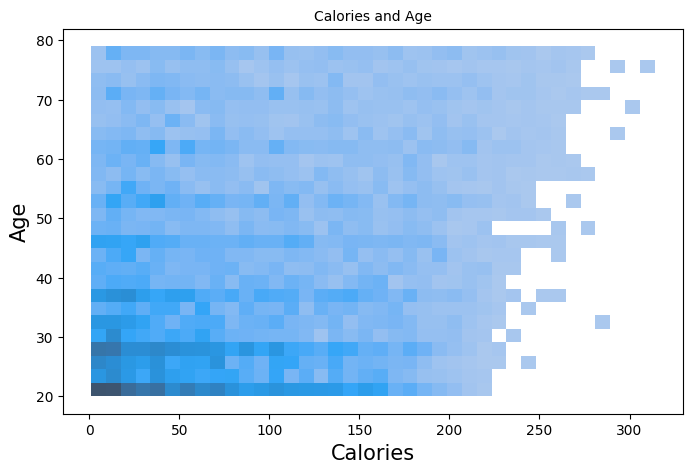

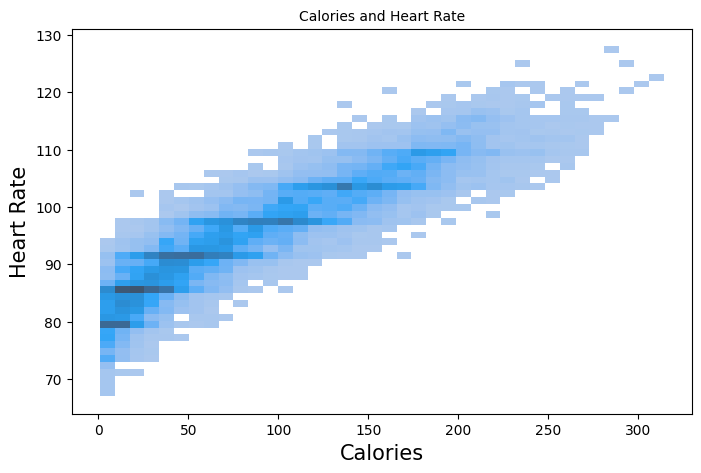

In [ ]:
plt.figure(figsize=(8, 5)) # Mengatur ukuran gambar
sns.histplot(dataset, x='Calories', y='Age')
plt.title('Calories and Age', size=10)  # Mengatur ukuran font judul
plt.xlabel('Calories', fontsize=15)  # Mengatur ukuran font label sumbu x
plt.ylabel('Age', fontsize=15)  # Mengatur ukuran font label sumbu y
plt.show()

plt.figure(figsize=(8, 5)) # Mengatur ukuran gambar
sns.histplot(dataset, x='Calories', y='Heart_Rate')
plt.title('Calories and Heart Rate', size=10)  # Mengatur ukuran font judul
plt.xlabel('Calories', fontsize=15)  # Mengatur ukuran font label sumbu x
plt.ylabel('Heart Rate', fontsize=15)  # Mengatur ukuran font label sumbu y
plt.show()

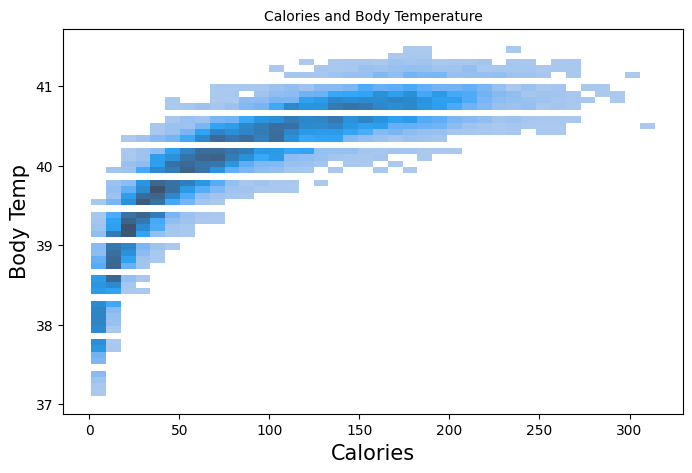

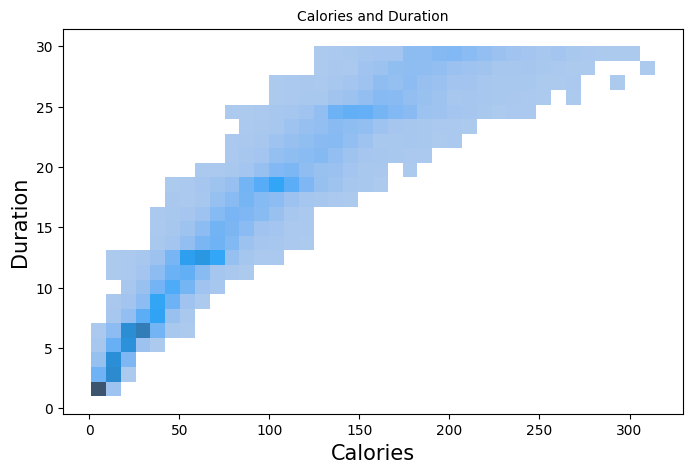

In [ ]:
plt.figure(figsize=(8, 5))  # Mengatur ukuran gambar
sns.histplot(dataset, x='Calories', y='Body_Temp')
plt.title('Calories and Body Temperature', size=10)  # Mengatur ukuran font judul
plt.xlabel('Calories', fontsize=15)  # Mengatur ukuran font label sumbu x
plt.ylabel('Body Temp', fontsize=15)  # Mengatur ukuran font label sumbu y
plt.show()

plt.figure(figsize=(8, 5))  # Mengatur ukuran gambar
sns.histplot(dataset, x='Calories', y='Duration')
plt.title('Calories and Duration', size=10)  # Mengatur ukuran font judul
plt.xlabel('Calories', fontsize=15)  # Mengatur ukuran font label sumbu x
plt.ylabel('Duration', fontsize=15)  # Mengatur ukuran font label sumbu y
plt.show()

### Multivariate

In [ ]:
# code buat Multivariate

In [ ]:
# melihat korelasi
cor = dataset.corr()
cor

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
User_ID,1.000000,-0.001827,-0.013520,-0.011603,-0.002751,-0.000457,0.000923,-0.001661
Age,-0.001827,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175,0.154395
Height,-0.013520,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200,0.017537
Weight,-0.011603,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095,0.035481
Duration,-0.002751,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167,0.955421
Heart_Rate,-0.000457,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529,0.897882
Body_Temp,0.000923,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000,0.824558
Calories,-0.001661,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558,1.000000


<Axes: >

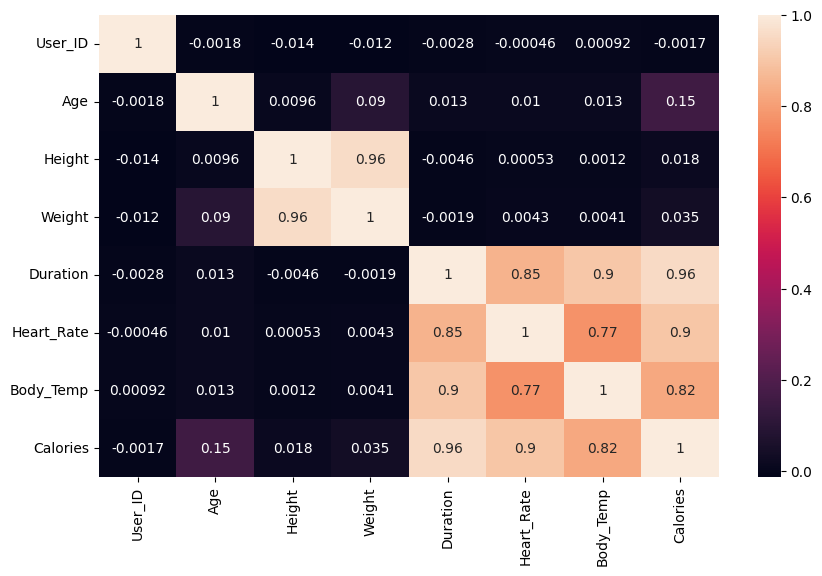

In [ ]:
# Corelation with Heatmap
fig,ax = plt.subplots(figsize = (10,6))
sns.heatmap(cor,annot=True)

### Mean, Modus and Median

In [ ]:
from scipy import stats
mean = np.mean(dataset[["Age", "Height", "Height", "Duration", "Heart_Rate", "Body_Temp", "Calories"]]);
mean

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Age            42.789800
Height        174.465133
Height        174.465133
Duration       15.530600
Heart_Rate     95.518533
Body_Temp      40.025453
Calories       89.539533
dtype: float64

In [ ]:
modus = stats.mode(dataset[["Age", "Height", "Weight", "Duration", "Heart_Rate", "Body_Temp", "Calories"]])
modus

ModeResult(mode=array([ 20. , 179. ,  66. ,  26. ,  91. ,  40.7,   7. ]), count=array([ 512.,  394.,  374.,  548.,  564., 1041.,  161.]))

In [ ]:
medianAge = dataset["Age"].median()
print("Median Age: ", medianAge)
medianHeight = dataset["Height"].median()
print("Median Height: ", medianHeight)
medianWeight = dataset["Weight"].median()
print("Median Weight: ", medianWeight)
medianDuration = dataset["Duration"].median()
print("Median Duration: ", medianDuration)
medianHeart_Rate = dataset["Heart_Rate"].median()
print("Median Heart Rate: ", medianHeart_Rate)
medianBody_Temp = dataset["Body_Temp"].median()
print("Median Body Temp: ", medianBody_Temp)
medianCalories = dataset["Calories"].median()
print("Median Calories: ", medianCalories)

Median Age:  39.0
Median Height:  175.0
Median Weight:  74.0
Median Duration:  16.0
Median Heart Rate:  96.0
Median Body Temp:  40.2
Median Calories:  79.0


## Data Modeling

In [ ]:
y = targets = labels = output_var = dataset["Calories"]
X = predictors = input_var = dataset.loc[:,dataset.columns != "Calories"]

In [ ]:
print("Input Variables", list(X.columns))
print("Output Variable", "['Calories']")

Input Variables ['User_ID', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']
Output Variable ['Calories']


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Age         15000 non-null  int64  
 2   Height      15000 non-null  float64
 3   Weight      15000 non-null  float64
 4   Duration    15000 non-null  float64
 5   Heart_Rate  15000 non-null  float64
 6   Body_Temp   15000 non-null  float64
 7   Calories    15000 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 1.0 MB


In [ ]:
from sklearn.model_selection import train_test_split

X = dataset.drop('Calories', axis=1)
y = dataset['Calories']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (10500, 7)
X_test shape: (4500, 7)
y_train shape: (10500,)
y_test shape: (4500,)


In [ ]:
from sklearn.linear_model import LinearRegression

# Membuat model regresi linear
model = LinearRegression()

# train model
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Tampilkan koefisien (slope) dari setiap fitur
print("Koefisien (slope):", model.coef_)

# Tampilkan intersep (intercept) dari model
print("Intersep (intercept):", model.intercept_)

Koefisien (slope): [ 4.12757394e-08  5.03047404e-01 -1.48471160e-01  2.34845565e-01
  6.63169262e+00  1.98494892e+00 -1.69200454e+01]
Intersep (intercept): 460.2597067500656


In [ ]:
# code buat data modeling

## Model Evaluation

In [ ]:
# Import library yang dibutuhkan
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Melakukan prediksi berdasarkan data uji
y_pred = model.predict(X_test)

# Melakukan evaluasi model dengan metrik Mean Absolute Error, Mean Square Error, dan R-squared
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared (R2) Score:", r2)

Mean Absolute Error: 8.451880213841953
Mean Squared Error: 133.01166037331058
R-squared (R2) Score: 0.9663040683841515


In [ ]:
data = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
data.head(10)

,Actual,Predicted
11499,173.0,170.621932
6475,189.0,192.159928
13167,53.0,56.891748
862,161.0,155.693338
5970,226.0,212.205686
6706,179.0,184.504570
3017,98.0,94.486012
3781,44.0,50.383228
3898,79.0,82.547257
2250,59.0,56.311156


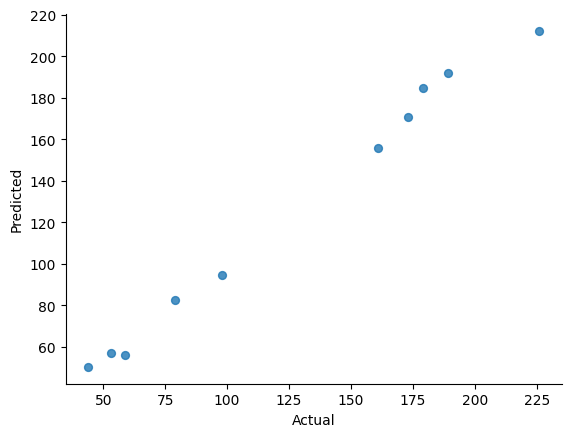

In [ ]:
from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Actual', y='Predicted', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
import statsmodels.api as sm

# Persiapkan data
X = X_train  # Variabel independen
Y = y_train    # Variabel dependen

# Tambahkan kolom konstanta
X = sm.add_constant(X)

# Inisialisasi dan latih model
model = sm.OLS(Y, X)
results = model.fit()

# Tampilkan summary output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               Calories   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                 4.466e+04
Date:                Wed, 27 Mar 2024   Prob (F-statistic):               0.00
Time:                        03:22:58   Log-Likelihood:                -40288.
No. Observations:               10500   AIC:                         8.059e+04
Df Residuals:                   10492   BIC:                         8.065e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        460.2597     13.139     35.030      0.0

In [ ]:
# code buat model evaluation

## Kesimpulan

Dari data tersebut bisa disimpulkan kalau Duration (dengan 6.6317), Heart Rate (dengan 1.9849), Age (dengan  0.5030), dan Weight(dengan 0.2348) memiliki peran yang cukup besar dalam membakar atau mengurangi kalori yang ada di tubuh seseorang.

Dari data tersebut juga diperoleh NIlai:
- Mean Absolute Error: 8.451880213841953
- Mean Squared Error: 133.01166037331058
- R-squared (R2) Score: 0.9663040683841515

#### Nama Kelompok

- Fadhilah Awal Rizqiansyah
-
-
...